# KNN

# 실습

n_neighbors 를 변경하여 accuracy 를 test. visualization 을 통하여 위 결과와 비교하라.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

# 꽃받침 길이, 너비 두가지 feature 선택
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
clf = neighbors.KNeighborsClassifier(n_neighbors=10, weights='uniform')
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
print("accuracy = {}".format(accuracy_score(y_test, y_predict)))

accuracy = 0.8


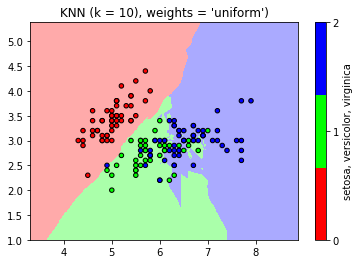

In [27]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = 10), weights = 'uniform')")
plt.colorbar(ticks=range(3), format='%d', label='setosa, versicolor, virginica')